# Analyse datas bellesdemeures.com - Paris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
data_full = pd.read_csv("immos_paris_2020-01-25.csv")

In [3]:
data_full.shape

(2752, 14)

In [4]:
data_full.describe()

,surface,field_surface,rooms,bedrooms,balcony,parking,district,id
count,2745.000000,39.000000,2701.000000,2697.000000,701.000000,504.000000,2752.000000,2.752000e+03
mean,159.770856,245.461538,5.070344,3.018539,1.365193,1.325397,11.172965,1.512779e+08
std,110.353172,295.614867,2.200895,1.449070,1.074716,0.640941,4.973637,7.045684e+06
min,8.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,7.639020e+07
25%,92.000000,67.500000,4.000000,2.000000,1.000000,1.000000,7.000000,1.507596e+08
50%,136.000000,160.000000,5.000000,3.000000,1.000000,1.000000,11.000000,1.534028e+08
75%,192.000000,251.000000,6.000000,4.000000,1.000000,2.000000,16.000000,1.550661e+08
max,1700.000000,1370.000000,30.000000,29.000000,17.000000,5.000000,20.000000,1.557649e+08


In [5]:
data_full.head()

,typeof,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,district,id,agency,link,price
0,Appartement,333.0,NaN,10.0,5.0,NON,NaN,NON,3.0,16,145963599,Paris Ouest Sotheby's IR - Paris 17ème,https://www.bellesdemeures.com/annonces/vente/...,De 3M à 10M
1,Appartement,230.0,NaN,5.0,1.0,OUI,NaN,NON,NaN,16,140321175,Paris Ouest Sotheby's IR - Paris 17ème,https://www.bellesdemeures.com/annonces/vente/...,6300000
2,Appartement,377.0,NaN,9.0,4.0,NON,1.0,NON,2.0,16,146762213,Paris Ouest Sotheby's IR - Paris 16ème,https://www.bellesdemeures.com/annonces/vente/...,5650000
3,Appartement,171.0,NaN,5.0,2.0,NON,NaN,NON,NaN,1,151773959,Paris Ouest Sotheby s IR - Auteuil,https://www.bellesdemeures.com/annonces/vente/...,De 3M à 10M
4,Appartement,354.0,NaN,10.0,6.0,NON,1.0,NON,1.0,8,140589363,Paris Ouest Sotheby's IR - Paris 17ème,https://www.bellesdemeures.com/annonces/vente/...,5450000


In [6]:
columns = data_full.columns.values
columns

array(['typeof', 'surface', 'field_surface', 'rooms', 'bedrooms',
       'terrace', 'balcony', 'pool', 'parking', 'district', 'id',
       'agency', 'link', 'price'], dtype=object)

In [7]:
data_full.dtypes

typeof            object
surface          float64
field_surface    float64
rooms            float64
bedrooms         float64
terrace           object
balcony          float64
pool              object
parking          float64
district           int64
id                 int64
agency            object
link              object
price             object
dtype: object

La colonne price est considérée comme non numérique , il faut changer son format

## Analyse price et modification type colonne
 Modification du format des prix , changement de la colonne price en numerique et distribution

Certains biens n'ont pas de prix affiché il faut les supprimer

In [8]:
price_na = data_full.loc[data_full['price'].isnull()]
data_full = data_full.drop(price_na.index, axis=0)
data_full.shape

(2748, 14)

Il faut chercher toutes les lignes avec un prix qui contient des lettres pour pouvoir le modifier

In [9]:
wrong_prices_df = data_full[data_full['price'].str.contains('[a-z]+', regex=True)]
wrong_prices_df['price']

0          De 3M à 10M
3          De 3M à 10M
20            + de 10M
82        De 1,7M à 3M
86        De 1,7M à 3M
             ...      
2699       De 3M à 10M
2718          + de 10M
2735         - de 1,1M
2739    De 1,1M à 1,7M
2746          + de 10M
Name: price, Length: 61, dtype: object

On enregistre le numéro des lignes pour verification finale

In [10]:
wprices_index = wrong_prices_df.index

#### Modification des prix à l'aide des regex
    On remplace toutes les virgules par des points
    On cherche ensuite tout les valeurs numériques ou décimales
    - \d* 0 or more digits
    - \.? optional dot because in regex . is a special character
    - \d* 0 ore more digits ( decimal part )
    
    On se retrouve avec des listes avec les valeurs numériques qui nous interesse 
    On boucle sur chacune de ces listes pour faire une moyenne de ces valeurs numériques Ex : de 3 à 10M = (3+10)/2 * 1M
    On passe tout en millions , cette fonction ne fonctionnera pas si les prix dans un mauvais format ne sont pas en millions d'euros
    
     Un seul cas ou l'annonce dit " Moins de 1.1M " on laissera le prix a 1.1M


In [11]:
good_prices = []
for wrong_price in wrong_prices_df['price']:
    print(wrong_price)
    wrong_price = wrong_price.replace(',', '.')
    numbers_price = re.findall("\d*\.?\d*", wrong_price)
    print(numbers_price)
    sum = 0
    i = 0
    for number in numbers_price:
        if number != '':
            sum += float(number)
            i += 1
    good_price = (sum/i)*1000000
    good_prices.append(good_price)


print(good_prices)

De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
De 1,7M à 3M
['', '', '', '1.7', '', '', '', '', '3', '', '']
De 1,7M à 3M
['', '', '', '1.7', '', '', '', '', '3', '', '']
De 1,7M à 3M
['', '', '', '1.7', '', '', '', '', '3', '', '']
De 1,1M à 1,7M
['', '', '', '1.1', '', '', '', '', '1.7', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
+ de 10M
['', '', '', '', '', '10', 

On change maintenant toutes les lignes ou le prix pose probleme par le bon

In [12]:
data_full.loc[data_full['price'].str.contains('[a-z]+', regex=True), 'price'] = good_prices

Verification

In [13]:
for index in wprices_index:
    print(data_full.loc[index]['price'])

6500000.0
6500000.0
10000000.0
2350000.0
2350000.0
2350000.0
1400000.0
10000000.0
10000000.0
10000000.0
6500000.0
10000000.0
6500000.0
10000000.0
6500000.0
6500000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
6500000.0
1100000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
6500000.0
6500000.0
6500000.0
2350000.0
6500000.0
6500000.0
2350000.0
10000000.0
6500000.0
6500000.0
10000000.0
10000000.0
6500000.0
6500000.0
10000000.0
1100000.0
1400000.0
10000000.0


In [14]:
# les prix sont sous la forme 1 590 000 , on enleve les espaces
data_full['price'] = data_full['price'].replace('\s+', '', regex=True)
data_full['price']

0       6.5e+06
1       6300000
2       5650000
3       6.5e+06
4       5450000
         ...   
2747    2916000
2748    3400000
2749    4250000
2750     937300
2751    3500000
Name: price, Length: 2748, dtype: object

In [15]:
# remplace les prix sous la forme 237.000 en 237000
data_full['price'] = data_full['price'].replace('\.','', regex=True)

In [16]:
data_full['price'] = pd.to_numeric(data_full['price'])

In [17]:
data_full['price'].dtypes

dtype('float64')

In [18]:
data_full.price.isna().sum()

0

In [19]:
data_full['price'].describe()

count    2.748000e+03
mean     2.727077e+06
std      2.512901e+06
min      1.450000e+05
25%      1.390000e+06
50%      1.990000e+06
75%      3.200000e+06
max      4.200000e+07
Name: price, dtype: float64

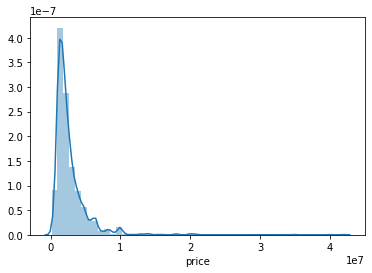

In [20]:
sns.distplot(data_full['price'])

## Division des datas en valeurs numériques ( quantitative ) et catégorielles ( qualititative ) 

district n'est pas une feature numérique mais un numéro d'arrondissement representant la localisation du bien.

In [21]:
data_full['district'] = data_full['district'].astype('str')

In [22]:
data_full.dtypes

typeof            object
surface          float64
field_surface    float64
rooms            float64
bedrooms         float64
terrace           object
balcony          float64
pool              object
parking          float64
district          object
id                 int64
agency            object
link              object
price            float64
dtype: object

In [23]:
qual = data_full.select_dtypes(include=['object']).columns
print(qual)

Index(['typeof', 'terrace', 'pool', 'district', 'agency', 'link'], dtype='object')


In [24]:
quan = data_full.select_dtypes(include=['int64','float64']).columns
quan = quan.drop(pd.Index(['price']))
quan = quan.drop(pd.Index(['id']))
print(quan)

Index(['surface', 'field_surface', 'rooms', 'bedrooms', 'balcony', 'parking'], dtype='object')


In [25]:
print(f"{len(qual)} catégorielles et {len(quan)} numériques")

6 catégorielles et 6 numériques


In [26]:
corrmat = data_full.corr()
corrmat

,surface,field_surface,rooms,bedrooms,balcony,parking,id,price
surface,1.000000,0.885161,0.831259,0.711669,0.043956,0.429781,-0.228978,0.820742
field_surface,0.885161,1.000000,0.640297,0.129917,-0.106693,-0.063766,-0.197186,0.750768
rooms,0.831259,0.640297,1.000000,0.829312,0.054172,0.379682,-0.172044,0.629264
bedrooms,0.711669,0.129917,0.829312,1.000000,0.068301,0.280868,-0.103389,0.516001
balcony,0.043956,-0.106693,0.054172,0.068301,1.000000,0.049825,0.052732,0.012157
parking,0.429781,-0.063766,0.379682,0.280868,0.049825,1.000000,-0.137996,0.274917
id,-0.228978,-0.197186,-0.172044,-0.103389,0.052732,-0.137996,1.000000,-0.233256
price,0.820742,0.750768,0.629264,0.516001,0.012157,0.274917,-0.233256,1.000000


## Analyse features numériques

In [27]:
data_full.shape

(2748, 14)

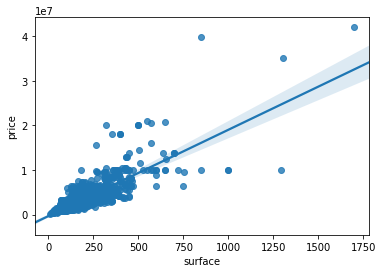

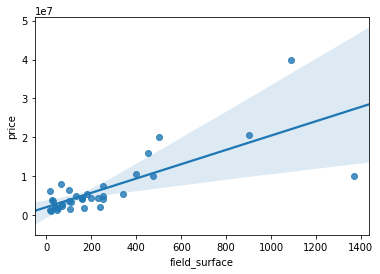

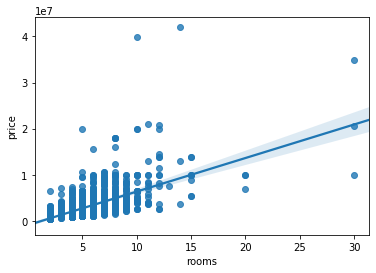

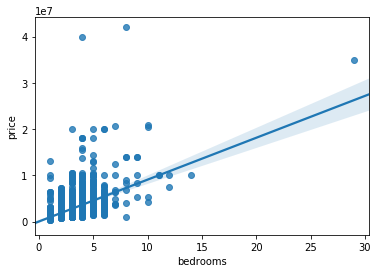

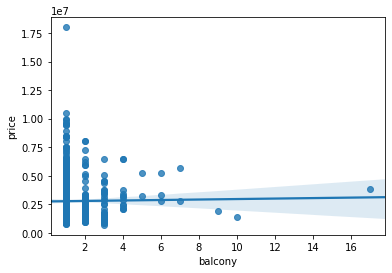

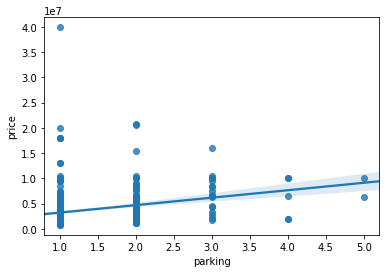

In [28]:
for feature in data_full[quan]:
    sns.regplot(x=feature,y='price', data=data_full)
    plt.show()

In [29]:
shape_before_outliers = data_full.shape[0]

### Certaines features semblent avoir des outliers , Analyse une par une

* #### Surface


corr : 0.82


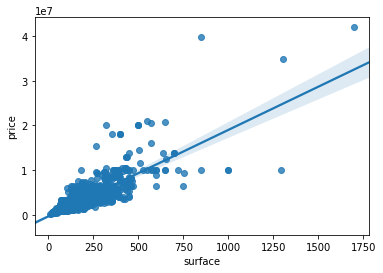

In [30]:
sns.regplot(x='surface',y='price', data=data_full)
print(f"corr : {round(data_full['surface'].corr(data_full['price']),2)}")

corr : 0.83


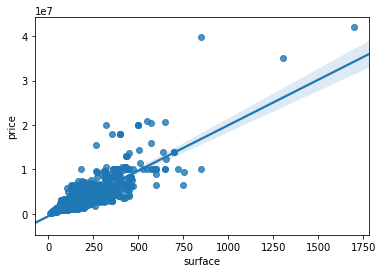

In [31]:
data_full = data_full.drop(data_full[(data_full['surface']>950) & (data_full['price'] < 11000000)].index).reset_index(drop=True)
sns.regplot(x='surface',y='price', data=data_full)
print(f"corr : {round(data_full['surface'].corr(data_full['price']),2)}")

In [32]:
data_full.shape

(2745, 14)

* #### Field_surface

corr : 0.91


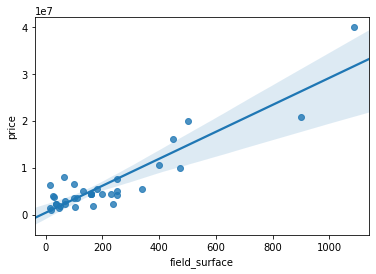

In [33]:
sns.regplot(x='field_surface',y='price', data=data_full)
print(f"corr : {round(data_full['field_surface'].corr(data_full['price']),2)}")

* #### Rooms

corr : 0.63


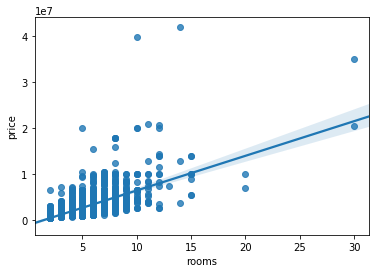

In [34]:
sns.regplot(x='rooms',y='price', data=data_full)
print(f"corr : {round(data_full['rooms'].corr(data_full['price']),2)}")

In [35]:
nb_outliers = shape_before_outliers - data_full.shape[0]
print(f"On a enlevé {nb_outliers} outliers")

On a enlevé 3 outliers


In [36]:
data_full.shape

(2745, 14)

## Traitement des valeurs manquantes dans le dataset

In [37]:
def hasnan(dataset):
    hasNAN = round((dataset.isnull().sum() / len(dataset)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
    hasNAN = hasNAN[hasNAN > 0] # On enleve celles qui n'ont pas de valeurs nulles 
    hasNAN = hasNAN.sort_values(ascending=False)
    missing_values = pd.DataFrame({'Missing Ratio': hasNAN})
    return missing_values

In [38]:
hasnan(data_full)

,Missing Ratio
field_surface,98.69
parking,81.79
balcony,74.54
bedrooms,1.97
rooms,1.86
surface,0.26


### balcony
On considère que NA signifie pas de balcon

### parking
On considère que NA signie pas de parking

### field_surface

In [40]:
data_full.typeof.value_counts()

Appartement             2573
Maison / Villa            98
Hôtel particulier         42
Loft/Atelier/Surface      32
Name: typeof, dtype: int64

In [41]:
data_full['field_surface'].isnull().sum()

2709

quasiment 99% des biens n'ont pas de surface du terrain renseigné , certains sont des appartements ou des lofts ce qui parait normal ( pas de terrain )

In [42]:
app_surface_null = data_full.loc[(data_full['typeof'] == 'Appartement') & (data_full['field_surface'].isnull())]
len(app_surface_null)

2573

In [43]:
loft_surface_null = data_full.loc[(data_full['typeof'] == 'Loft/Atelier/Surface') & (data_full['field_surface'].isnull())]
len(loft_surface_null)

32

In [44]:
house_surface_null = data_full.loc[(data_full['typeof'] == 'Maison / Villa') & (data_full['field_surface'].isnull())]
len(house_surface_null)

70

In [45]:
other_surface_null = data_full.loc[(data_full['typeof'] != 'Appartement') & (data_full['typeof'] != 'Loft/Atelier/Surface') & (data_full['field_surface'].isnull())]
len(other_surface_null)

104

Tous les appartements & lofts ont une surface de terrain nulle ( plutot logique.... ) sur les 140 biens restant ( 98 Maisons et 42 Hotels particuliers ) il y'en a 104 qui n'ont pas de surface de terrain indiqué

In [46]:
round(data_full.loc[data_full['field_surface'].notnull()]['field_surface'].mean(),2)

210.86

In [47]:
mode_field_surface = data_full.loc[data_full['field_surface'].notnull()]['field_surface'].mode()
print(mode_field_surface)
len(data_full.loc[data_full['field_surface'] == float(mode_field_surface)])


0    160.0
dtype: float64


4

In [48]:
median_field_surface = data_full.loc[data_full['field_surface'].notnull()]['field_surface'].median()
median_field_surface

160.0

#### Traitement des NA

On va remplacer les NA des biens de types Maison et Hotel particulier par la médianes des surfaces de terrain connues ( 160m² )

### rooms
Analyse des biens dont le nombre de pièces n'est pas précisé

In [49]:
rooms_na = data_full.loc[data_full['rooms'].isnull()]
len(rooms_na)

51

In [50]:
rooms_na

,typeof,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,district,id,agency,link,price
225,Appartement,29.0,NaN,NaN,NaN,NON,NaN,NON,NaN,3,152892953,BARNES Le Marais,https://www.bellesdemeures.com/annonces/vente/...,499000.0
226,Appartement,23.0,NaN,NaN,NaN,NON,NaN,NON,NaN,4,147081995,BARNES Le Marais,https://www.bellesdemeures.com/annonces/vente/...,460000.0
227,Appartement,25.0,NaN,NaN,NaN,NON,NaN,NON,NaN,8,155449089,BARNES PIED-A-TERRE SAINT-HONORE,https://www.bellesdemeures.com/annonces/vente/...,460000.0
229,Appartement,20.0,NaN,NaN,NaN,NON,NaN,NON,NaN,5,155310427,BARNES PANTHEON,https://www.bellesdemeures.com/annonces/vente/...,320000.0
241,Appartement,207.0,NaN,NaN,4.0,NON,NaN,NON,NaN,16,154187363,CONSULTANTS IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...,2300000.0
250,Appartement,33.0,NaN,NaN,NaN,NON,NaN,NON,NaN,6,145691571,Consultants Immobilier Motte Picquet,https://www.bellesdemeures.com/annonces/vente/...,540000.0
281,Appartement,13.0,NaN,NaN,NaN,NON,NaN,NON,NaN,5,155717149,BRETEUIL IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...,237000.0
460,Appartement,45.0,NaN,NaN,NaN,NON,NaN,NON,NaN,8,153274627,GROUPE MOBILIS Paris Champs-Élysées,https://www.bellesdemeures.com/annonces/vente/...,787000.0
485,Appartement,66.0,NaN,NaN,NaN,NON,NaN,NON,1.0,8,144583779,RONTEIX MONTAIGNE,https://www.bellesdemeures.com/annonces/vente/...,1650000.0
486,Hôtel particulier,450.0,NaN,NaN,4.0,NON,NaN,NON,NaN,16,149041449,BARNES BIENS D'EXCEPTION,https://www.bellesdemeures.com/annonces/vente/...,13800000.0


#### Traitement des NA

Par soucis d'automatisation et rapidité , on va supprimer tout les biens dont le nombre de pièces n'est pas précisé ( le nombre n'est pas important sur l'ensemble du dataset moins de 2 % )  , On pourrait regarder annonce par annonce , ou se dire qu'un bien a forcement une pièce . De plus dans le dataset il semble que le nombre de chambres est compris dans le nombres de pieces ( rooms > bedrooms quand il y'a les deux infos ) on pourrait remplir tout les rooms avec bedrooms + 1 mais ca ne refléterais pas forcement la réalité du bien

### bedrooms
Analyse des biens dont le nombre de chambres n'est pas précisés

In [51]:
bedrooms_na = data_full.loc[data_full['bedrooms'].isnull()]
len(bedrooms_na)

54

In [52]:
bedrooms_na

,typeof,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,district,id,agency,link,price
225,Appartement,29.0,NaN,NaN,NaN,NON,NaN,NON,NaN,3,152892953,BARNES Le Marais,https://www.bellesdemeures.com/annonces/vente/...,499000.0
226,Appartement,23.0,NaN,NaN,NaN,NON,NaN,NON,NaN,4,147081995,BARNES Le Marais,https://www.bellesdemeures.com/annonces/vente/...,460000.0
227,Appartement,25.0,NaN,NaN,NaN,NON,NaN,NON,NaN,8,155449089,BARNES PIED-A-TERRE SAINT-HONORE,https://www.bellesdemeures.com/annonces/vente/...,460000.0
229,Appartement,20.0,NaN,NaN,NaN,NON,NaN,NON,NaN,5,155310427,BARNES PANTHEON,https://www.bellesdemeures.com/annonces/vente/...,320000.0
250,Appartement,33.0,NaN,NaN,NaN,NON,NaN,NON,NaN,6,145691571,Consultants Immobilier Motte Picquet,https://www.bellesdemeures.com/annonces/vente/...,540000.0
281,Appartement,13.0,NaN,NaN,NaN,NON,NaN,NON,NaN,5,155717149,BRETEUIL IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...,237000.0
283,Appartement,68.0,NaN,2.0,NaN,OUI,NaN,NON,NaN,5,154834489,ARIANE IMMOBILIER MONTREUIL,https://www.bellesdemeures.com/annonces/vente/...,1050000.0
460,Appartement,45.0,NaN,NaN,NaN,NON,NaN,NON,NaN,8,153274627,GROUPE MOBILIS Paris Champs-Élysées,https://www.bellesdemeures.com/annonces/vente/...,787000.0
485,Appartement,66.0,NaN,NaN,NaN,NON,NaN,NON,1.0,8,144583779,RONTEIX MONTAIGNE,https://www.bellesdemeures.com/annonces/vente/...,1650000.0
1481,Appartement,90.0,NaN,NaN,NaN,NON,NaN,NON,NaN,14,155081629,AKOUN PROPRIETES,https://www.bellesdemeures.com/annonces/vente/...,1800000.0


#### Traitement des NA

Meme traitement que pour les pièces , on supprime le nombre de biens qui n'ont pas de chambres renseignés , le nombre total n'est pas trés important , on pourrait mettre au moins 1 chambre à chaque bien , ou verifier annonce par annonce

### Surface

In [53]:
surface_na = data_full.loc[data_full['surface'].isnull()]
len(surface_na)

7

In [54]:
surface_na

,typeof,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,district,id,agency,link,price
2108,Appartement,NaN,NaN,5.0,3.0,NON,NaN,NON,NaN,16,155459465,ARMAND BONDUELLE IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...,5200000.0
2109,Appartement,NaN,NaN,5.0,3.0,NON,NaN,NON,NaN,17,155604455,Valenia,https://www.bellesdemeures.com/annonces/vente/...,1435000.0
2110,Appartement,NaN,NaN,2.0,1.0,NON,1.0,NON,NaN,8,151188837,Engel & Völkers Paris,https://www.bellesdemeures.com/annonces/vente/...,1365000.0
2638,Appartement,NaN,NaN,7.0,4.0,NON,NaN,NON,1.0,6,144146033,CBRE CONSEIL et TRANSACTION,https://www.bellesdemeures.com/annonces/vente/...,4000000.0
2666,Maison / Villa,NaN,NaN,7.0,5.0,OUI,NaN,NON,1.0,18,94399725,BELLES DEMEURES,https://www.bellesdemeures.com/annonces/vente/...,2995000.0
2677,Appartement,NaN,NaN,7.0,NaN,NON,NaN,OUI,NaN,16,94397485,BELLES DEMEURES,https://www.bellesdemeures.com/annonces/vente/...,3194000.0
2734,Appartement,NaN,NaN,7.0,4.0,NON,NaN,NON,NaN,16,76390195,PARK LANE,https://www.bellesdemeures.com/annonces/vente/...,2400000.0


In [55]:
# Lien des biens qui n'ont pas de surface indiqué
# for index in surface_na.index:
#     print(data_full.loc[index]['link'])

Il semble que les biens dont les surfaces ne sont pas indiqués ont des surfaces modestes dont la taille n'est pas mise en avant par l'agence , mais il y'a aussi des biens trés onéreux dont la surface n'est pas indiqué et utiliser une médiane ou une moyenne ne semble pas trés judicieux ( on va se retrouver avec des biens trés cher et des surfaces modestes ce qui va nuire à la qualité du modèle ) , on va supprimer ces biens la par soucis de facilité

In [56]:
def remplace_na(dataset):
    dataset["balcony"] = dataset["balcony"].fillna(0)
    dataset["parking"] = dataset["parking"].fillna(0)

    
    # remplacer field_surface pour appartement & loft = 0 , pour les autres par la médiane
    dataset.loc[((dataset['typeof'] == 'Appartement') | (dataset['typeof'] == 'Loft/Atelier/Surface')) & (dataset['field_surface'].isnull()) ,'field_surface'] = 0
    dataset.loc[(dataset['typeof'] != 'Appartement') & (dataset['typeof'] != 'Loft/Atelier/Surface') & (dataset['field_surface'].isnull()) ,'field_surface'] = dataset.loc[dataset['field_surface'].notnull()]['field_surface'].median()

    # On supprime tout les biens dont le nombre de pièces n'est pas renseigné
    rooms_na = dataset.loc[dataset['rooms'].isnull()]
    dataset = dataset.drop(rooms_na.index, axis=0)
    
    # On supprime tout les biens dont le nombre de chambre n'est pas renseigné
    bedrooms_na = dataset.loc[dataset['bedrooms'].isnull()]
    dataset = dataset.drop(bedrooms_na.index, axis=0)
    
    # On supprime tout les biens dont la surface n'est pas renseigné
    surface_na = dataset.loc[dataset['surface'].isnull()]
    dataset = dataset.drop(surface_na.index, axis=0)
    
    
    return dataset

In [57]:
data_full = remplace_na(data_full)
data_full.shape

(2675, 14)

In [58]:
hasnan(data_full)

,Missing Ratio


Tout les NA ont bien été traités.

## Analyse features catégorielles ( transformation en numériques )
    a faire 
    modifier typeof avec map 
    dummies terrasse , pool , district 
    on vire agency et link

### Typeof

In [59]:
data_full.typeof.value_counts()

Appartement             2511
Maison / Villa            96
Hôtel particulier         40
Loft/Atelier/Surface      28
Name: typeof, dtype: int64

In [60]:
data_full.typeof.isnull().sum()

0

In [61]:
#Moyenne de la surface des biens de type "Maison/Villa"
meansur_house =  data_full.loc[data_full['typeof'] == 'Maison / Villa']['surface'].mean()
meansur_apartment =  data_full.loc[data_full['typeof'] == 'Appartement']['surface'].mean()
meansur_hostel =  data_full.loc[data_full['typeof'] == 'Hôtel particulier']['surface'].mean()
meansur_loft =  data_full.loc[data_full['typeof'] == 'Loft/Atelier/Surface']['surface'].mean()

In [64]:
print(f"Surface moyenne des maisons : {round(meansur_house,2)}")
print(f"Surface moyenne des appartements : {round(meansur_apartment,2)}")
print(f"Surface moyenne des hotels particuliers : {round(meansur_hostel,2)}")
print(f"Surface moyenne des lofts : {round(meansur_loft,2)}")

Surface moyenne des maisons : 287.56
Surface moyenne des appartements : 149.14
Surface moyenne des hotels particuliers : 451.6
Surface moyenne des lofts : 173.71


#### Traitement de la colonne typeof

En considérant la moyenne des surfaces de chaque type de bien on peut transformer cette colonne avec map en considerant que appartement = 1 , lofts = 2 , maison = 3 , hotel particulier = 4

In [65]:
data_full.typeof = data_full.typeof.map({'Appartement':1, 'Loft/Atelier/Surface':2, 'Maison / Villa':3, 'Hôtel particulier':4 })

In [66]:
data_full.head(1)

,typeof,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,district,id,agency,link,price
0,1,333.0,0.0,10.0,5.0,NON,0.0,NON,3.0,16,145963599,Paris Ouest Sotheby's IR - Paris 17ème,https://www.bellesdemeures.com/annonces/vente/...,6500000.0


In [67]:
data_full.dtypes

typeof             int64
surface          float64
field_surface    float64
rooms            float64
bedrooms         float64
terrace           object
balcony          float64
pool              object
parking          float64
district          object
id                 int64
agency            object
link              object
price            float64
dtype: object

### Dummies des colonnes terrace , pool , localisation
On supprime les colonnes agency link et id  qui ne serviront pas pour la prédiction

In [68]:
data_full = data_full.drop(['agency'], axis=1)
data_full = data_full.drop(['link'], axis=1)
data_full = data_full.drop(['id'], axis=1)

In [69]:
data_full.head(1)
print(data_full.shape)

(2675, 11)


Mise a jour quali/quanti pour get_dummies sur les colonnes catégorielles

In [70]:
quan = data_full.select_dtypes(include=['int64','float64']).columns
qual = data_full.select_dtypes(include=['object']).columns

In [71]:
quan

Index(['typeof', 'surface', 'field_surface', 'rooms', 'bedrooms', 'balcony',
       'parking', 'price'],
      dtype='object')

In [72]:
qual

Index(['terrace', 'pool', 'district'], dtype='object')

In [73]:
data_full = pd.get_dummies(data_full, columns=qual, drop_first=True)

In [74]:
data_full.head(1)

,typeof,surface,field_surface,rooms,bedrooms,balcony,parking,price,terrace_OUI,pool_OUI,...,district_19,district_2,district_20,district_3,district_4,district_5,district_6,district_7,district_8,district_9
0,1,333.0,0.0,10.0,5.0,0.0,3.0,6500000.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
data_full.shape

(2675, 29)

18 nouvelles features !

## enregistrement en csv

In [76]:
data_full.to_csv('immos_paris_dataset_clean.csv')